In [62]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import os
%matplotlib inline

In [2]:
#Read training data
df = pd.read_csv('../input/train.csv')

In [26]:
TEST_ROOT='../input/test/'
test_files=os.listdir(TEST_ROOT)
for file in test_files:
    this_path=TEST_ROOT+file
    with open(this_path) as f:
        this_len=len(f.readlines())
    print('%s len: %d'%(file,this_len))

seg_51f0a2.csv len: 150001
seg_de98fa.csv len: 150001
seg_ad82ca.csv len: 150001
seg_e3ca24.csv len: 150001
seg_64f8dc.csv len: 150001
seg_e6c973.csv len: 150001
seg_88b289.csv len: 150001
seg_8c1e7d.csv len: 150001
seg_b7a8a1.csv len: 150001
seg_18096a.csv len: 150001
seg_7f5b6f.csv len: 150001
seg_d753f8.csv len: 150001
seg_55239a.csv len: 150001
seg_7a9f2b.csv len: 150001
seg_2d402d.csv len: 150001
seg_ce5520.csv len: 150001
seg_7540f3.csv len: 150001
seg_d1cb37.csv len: 150001
seg_2ea616.csv len: 150001
seg_4a91a9.csv len: 150001
seg_80211c.csv len: 150001
seg_5d45db.csv len: 150001
seg_a63573.csv len: 150001
seg_09ed4e.csv len: 150001
seg_04a696.csv len: 150001
seg_9aa6e2.csv len: 150001
seg_dbc615.csv len: 150001
seg_ba2c48.csv len: 150001
seg_1e0b82.csv len: 150001
seg_a9b957.csv len: 150001
seg_87e4e8.csv len: 150001
seg_d14524.csv len: 150001
seg_ea096b.csv len: 150001
seg_4f76a2.csv len: 150001
seg_2cdbe3.csv len: 150001
seg_696621.csv len: 150001
seg_e6e1df.csv len: 150001
s

seg_c20c06.csv len: 150001
seg_b91011.csv len: 150001
seg_922990.csv len: 150001
seg_5924f5.csv len: 150001
seg_a03e6a.csv len: 150001
seg_bb171f.csv len: 150001
seg_d19980.csv len: 150001
seg_e2209b.csv len: 150001
seg_dd780d.csv len: 150001
seg_e2c82c.csv len: 150001
seg_86720f.csv len: 150001
seg_389906.csv len: 150001
seg_41be18.csv len: 150001
seg_f77ee5.csv len: 150001
seg_83bef8.csv len: 150001
seg_aee9bf.csv len: 150001
seg_35269b.csv len: 150001
seg_6fc3ef.csv len: 150001
seg_5e541f.csv len: 150001
seg_003339.csv len: 150001
seg_7f93b2.csv len: 150001
seg_93f935.csv len: 150001
seg_77f9e3.csv len: 150001
seg_3a22ac.csv len: 150001
seg_3e00cd.csv len: 150001
seg_827c07.csv len: 150001
seg_cee7d0.csv len: 150001
seg_53e645.csv len: 150001
seg_398a25.csv len: 150001
seg_0b54ac.csv len: 150001
seg_931244.csv len: 150001
seg_b23489.csv len: 150001
seg_709d08.csv len: 150001
seg_016913.csv len: 150001
seg_2916e3.csv len: 150001
seg_32fc4e.csv len: 150001
seg_8e5704.csv len: 150001
s

seg_8f6284.csv len: 150001
seg_abeca6.csv len: 150001
seg_2c762c.csv len: 150001
seg_62331a.csv len: 150001
seg_d0598e.csv len: 150001
seg_195eda.csv len: 150001
seg_725772.csv len: 150001
seg_6262c4.csv len: 150001
seg_f073e2.csv len: 150001
seg_115617.csv len: 150001
seg_1d980f.csv len: 150001
seg_bd40f2.csv len: 150001
seg_b9619c.csv len: 150001
seg_03d386.csv len: 150001
seg_e0f296.csv len: 150001
seg_b9de03.csv len: 150001
seg_6e572a.csv len: 150001
seg_31d763.csv len: 150001
seg_83f476.csv len: 150001
seg_fd6340.csv len: 150001
seg_3c4106.csv len: 150001
seg_037461.csv len: 150001
seg_f96d5a.csv len: 150001
seg_a2fd8b.csv len: 150001
seg_c472cf.csv len: 150001
seg_687a5c.csv len: 150001
seg_53d818.csv len: 150001
seg_ae9761.csv len: 150001
seg_f734c8.csv len: 150001
seg_288001.csv len: 150001
seg_a00985.csv len: 150001
seg_26a2a0.csv len: 150001
seg_bf4ec0.csv len: 150001
seg_46012e.csv len: 150001
seg_6f650f.csv len: 150001
seg_ad3a44.csv len: 150001
seg_28fc32.csv len: 150001
s

seg_72858d.csv len: 150001
seg_89885a.csv len: 150001
seg_952faa.csv len: 150001
seg_74d8cc.csv len: 150001
seg_8f592b.csv len: 150001
seg_e405fe.csv len: 150001
seg_462c1d.csv len: 150001
seg_c70fde.csv len: 150001
seg_ac68bb.csv len: 150001
seg_ea9d37.csv len: 150001
seg_02042f.csv len: 150001
seg_010eab.csv len: 150001
seg_e5c033.csv len: 150001
seg_4b4c91.csv len: 150001
seg_19b08e.csv len: 150001
seg_63c8e4.csv len: 150001
seg_b66b87.csv len: 150001
seg_0b76f5.csv len: 150001
seg_613702.csv len: 150001
seg_21faa9.csv len: 150001
seg_72aba8.csv len: 150001
seg_78852d.csv len: 150001
seg_b0cf32.csv len: 150001
seg_b7b098.csv len: 150001
seg_ebe36c.csv len: 150001
seg_655780.csv len: 150001
seg_91596c.csv len: 150001
seg_71238c.csv len: 150001
seg_bce305.csv len: 150001
seg_01a8dc.csv len: 150001
seg_35b009.csv len: 150001
seg_9e61da.csv len: 150001
seg_5fe414.csv len: 150001
seg_35b753.csv len: 150001
seg_fb76ca.csv len: 150001
seg_d36055.csv len: 150001
seg_ecdca4.csv len: 150001
s

seg_ab001b.csv len: 150001
seg_14c435.csv len: 150001
seg_9cb464.csv len: 150001
seg_563059.csv len: 150001
seg_95644e.csv len: 150001
seg_2642d4.csv len: 150001
seg_90a0be.csv len: 150001
seg_aa508a.csv len: 150001
seg_ddd206.csv len: 150001
seg_913ffc.csv len: 150001
seg_fa488e.csv len: 150001
seg_ba3c47.csv len: 150001
seg_d1045e.csv len: 150001
seg_e80726.csv len: 150001
seg_740837.csv len: 150001
seg_643d1f.csv len: 150001
seg_61219c.csv len: 150001
seg_ba98dc.csv len: 150001
seg_da8b88.csv len: 150001
seg_ca67ee.csv len: 150001
seg_c6b514.csv len: 150001
seg_92092a.csv len: 150001
seg_f165f6.csv len: 150001
seg_ba941e.csv len: 150001
seg_9872f9.csv len: 150001
seg_fbf17a.csv len: 150001
seg_f6abc5.csv len: 150001
seg_c6f9c2.csv len: 150001
seg_fa34c7.csv len: 150001
seg_3f3983.csv len: 150001
seg_c5325c.csv len: 150001
seg_420d4e.csv len: 150001
seg_2005a7.csv len: 150001
seg_7a9228.csv len: 150001
seg_eefd4a.csv len: 150001
seg_a704ee.csv len: 150001
seg_91cff2.csv len: 150001
s

seg_468fdb.csv len: 150001
seg_64daae.csv len: 150001
seg_d2cb02.csv len: 150001
seg_0775a7.csv len: 150001
seg_e481c7.csv len: 150001
seg_004ee5.csv len: 150001
seg_65b962.csv len: 150001
seg_ab644e.csv len: 150001
seg_217eed.csv len: 150001
seg_36e32d.csv len: 150001
seg_cff594.csv len: 150001
seg_cf3825.csv len: 150001
seg_07fc6d.csv len: 150001
seg_572172.csv len: 150001
seg_d32f8a.csv len: 150001
seg_f43730.csv len: 150001
seg_b52dac.csv len: 150001
seg_1ebe6b.csv len: 150001
seg_593c34.csv len: 150001
seg_52c139.csv len: 150001
seg_9c635d.csv len: 150001
seg_58e9f9.csv len: 150001
seg_6edcb8.csv len: 150001
seg_d7f53a.csv len: 150001
seg_914a62.csv len: 150001
seg_04cceb.csv len: 150001
seg_b89218.csv len: 150001
seg_1c4c5b.csv len: 150001
seg_dd8805.csv len: 150001
seg_76c2fa.csv len: 150001
seg_dd0b11.csv len: 150001
seg_885f53.csv len: 150001
seg_fb9b2e.csv len: 150001
seg_1d044c.csv len: 150001
seg_4a9e8d.csv len: 150001
seg_6ab188.csv len: 150001
seg_591954.csv len: 150001
s

seg_d07c62.csv len: 150001
seg_afd665.csv len: 150001
seg_e8ad6b.csv len: 150001
seg_a437cb.csv len: 150001
seg_8a6b0e.csv len: 150001
seg_f9e4f2.csv len: 150001
seg_e9e65b.csv len: 150001
seg_318135.csv len: 150001
seg_9caf50.csv len: 150001
seg_dff078.csv len: 150001
seg_b7da0a.csv len: 150001
seg_661629.csv len: 150001
seg_b02e31.csv len: 150001
seg_911066.csv len: 150001
seg_11860f.csv len: 150001
seg_e10d3b.csv len: 150001
seg_079e34.csv len: 150001
seg_122ba9.csv len: 150001
seg_29e799.csv len: 150001
seg_ada81a.csv len: 150001
seg_82ce27.csv len: 150001
seg_dad4f2.csv len: 150001
seg_3bb90a.csv len: 150001
seg_6b0107.csv len: 150001
seg_12b9ba.csv len: 150001
seg_f21a22.csv len: 150001
seg_ce472b.csv len: 150001
seg_6ed49a.csv len: 150001
seg_e6b236.csv len: 150001
seg_b41d3c.csv len: 150001
seg_9d68cf.csv len: 150001
seg_3878d0.csv len: 150001
seg_0e3d44.csv len: 150001
seg_3adb1a.csv len: 150001
seg_093a0a.csv len: 150001
seg_b853c1.csv len: 150001
seg_a86a05.csv len: 150001
s

seg_41f45e.csv len: 150001
seg_aaa2ae.csv len: 150001
seg_e8ac98.csv len: 150001
seg_659ff8.csv len: 150001
seg_51865e.csv len: 150001
seg_482745.csv len: 150001
seg_b4402d.csv len: 150001
seg_c27591.csv len: 150001
seg_c42490.csv len: 150001
seg_8fd465.csv len: 150001
seg_708349.csv len: 150001
seg_c703be.csv len: 150001
seg_c3f672.csv len: 150001
seg_8e6a3f.csv len: 150001
seg_c47bdc.csv len: 150001
seg_cb0e21.csv len: 150001
seg_66ed4d.csv len: 150001
seg_b0f9cd.csv len: 150001
seg_56e3e7.csv len: 150001
seg_8f3dfe.csv len: 150001
seg_abaad2.csv len: 150001
seg_6ae32d.csv len: 150001
seg_43383f.csv len: 150001
seg_d9b162.csv len: 150001
seg_2d3828.csv len: 150001
seg_16566c.csv len: 150001
seg_f1b916.csv len: 150001
seg_cc667b.csv len: 150001
seg_6a45a0.csv len: 150001
seg_dc1cf0.csv len: 150001
seg_d4dec8.csv len: 150001
seg_8328f5.csv len: 150001
seg_c4af54.csv len: 150001
seg_9a7c46.csv len: 150001
seg_287fef.csv len: 150001
seg_cc7e39.csv len: 150001
seg_37bf85.csv len: 150001
s

seg_55d50b.csv len: 150001
seg_457234.csv len: 150001
seg_92310f.csv len: 150001
seg_750e7e.csv len: 150001
seg_284223.csv len: 150001
seg_d9a2bb.csv len: 150001
seg_ca8389.csv len: 150001
seg_a2e2c8.csv len: 150001
seg_d86eb6.csv len: 150001
seg_61b50d.csv len: 150001
seg_447972.csv len: 150001
seg_5e020f.csv len: 150001
seg_5bd9ae.csv len: 150001
seg_580b65.csv len: 150001
seg_509d55.csv len: 150001
seg_496d07.csv len: 150001
seg_6f2222.csv len: 150001
seg_39ad50.csv len: 150001
seg_5c9077.csv len: 150001
seg_74fcfc.csv len: 150001
seg_f6d51b.csv len: 150001
seg_f6e1ca.csv len: 150001
seg_c5064e.csv len: 150001
seg_7a5243.csv len: 150001
seg_b6bdaa.csv len: 150001
seg_a80f6f.csv len: 150001
seg_a489e1.csv len: 150001
seg_1e61d6.csv len: 150001
seg_f0cedb.csv len: 150001
seg_53fa13.csv len: 150001
seg_35ba8f.csv len: 150001
seg_5f0a92.csv len: 150001
seg_dc5e63.csv len: 150001
seg_7fd6b7.csv len: 150001
seg_4d53c2.csv len: 150001
seg_c21723.csv len: 150001
seg_31d810.csv len: 150001
s

In [14]:
df.shape

(629145480, 2)

In [9]:
df.acoustic_data.describe()

count    6.291455e+08
mean     4.519468e+00
std      1.073571e+01
min     -5.515000e+03
25%      2.000000e+00
50%      5.000000e+00
75%      7.000000e+00
max      5.444000e+03
Name: acoustic_data, dtype: float64

In [13]:
df.time_to_failure.describe()

count    6.291455e+08
mean     5.678292e+00
std      3.672697e+00
min      9.550396e-05
25%      2.625997e+00
50%      5.349798e+00
75%      8.173396e+00
max      1.610740e+01
Name: time_to_failure, dtype: float64

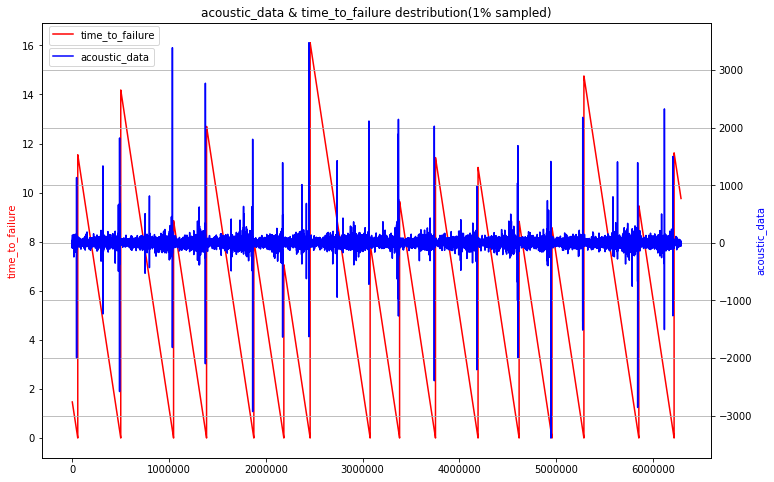

In [17]:
# 采样1%的数据
train_ad_sample_df = df['acoustic_data'].values[::100]
train_ttf_sample_df = df['time_to_failure'].values[::100]

def plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df, title="acoustic_data & time_to_failure destribution(1% sampled)"):
    fig, ax1 = plt.subplots(figsize=(12, 8))
    plt.title(title)
    plt.plot(train_ttf_sample_df, color='r')
    ax1.set_ylabel('time_to_failure', color='r')
    plt.legend(['time_to_failure'], loc=(0.01, 0.95))
    ax2 = ax1.twinx()
    plt.plot(train_ad_sample_df, color='b')
    ax2.set_ylabel('acoustic_data', color='b')
    plt.legend(['acoustic_data'], loc=(0.01, 0.9))
    plt.grid(True)

plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df)
del train_ad_sample_df
del train_ttf_sample_df

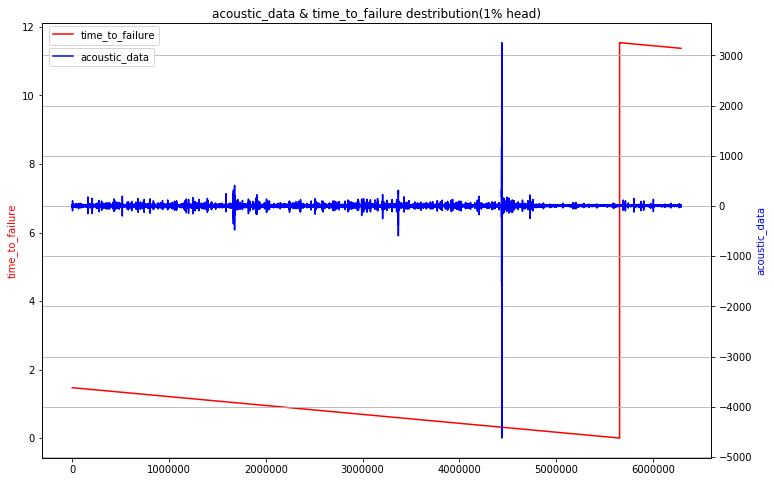

In [21]:
# 前1%的数据
train_ad_sample_df = df['acoustic_data'].values[:6291455]
train_ttf_sample_df = df['time_to_failure'].values[:6291455]
plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df, title="acoustic_data & time_to_failure destribution(1% head)")
del train_ad_sample_df
del train_ttf_sample_df

In [61]:
# -------------1. 特征工程------------

sample_length = 150000 # 每150000个连续的原始数据作为一个新的数据
num_samples=int((len(df) / sample_length)) #计算总的新数据量


# 构造新数据的属性
cols = ['mean','median','std','max','min','ptp','10p',
        '25p','50p','75p','90p']

X_all = pd.DataFrame(index=range(num_samples),dtype=np.float64)
y_all = pd.DataFrame(index=range(num_samples),dtype=np.float64)



# for i in tqdm(range(num_samples),total=num_samples,desc=''):
for i in tqdm_notebook(range(num_samples),desc='创建训练集特征中'):
    sample = df.iloc[i * sample_length:i * sample_length + sample_length]

    # Converts to pd.Series
    x = pd.Series(sample['acoustic_data'].values)

    # Grabs the final 'time_to_failure' value
    y = sample['time_to_failure'].values[-1]
    y_all.loc[i, 'time_to_failure'] = y

    # For every 150,000 rows, we make these calculations
    X_all.loc[i, 'mean'] = np.mean(x)
    X_all.loc[i, 'median'] = np.median(x)
    X_all.loc[i, 'std'] = np.std(x)
    X_all.loc[i, 'max'] = np.max(x)
    X_all.loc[i, 'min'] = np.min(x)
    X_all.loc[i, 'abs_max'] = np.abs(x).max()
    X_all.loc[i, 'abs_min'] = np.abs(x).min()
    X_all.loc[i, 'ptp'] = np.ptp(x)  # Peak-to-peak is like range
    # We can also grab percentiles
    X_all.loc[i, '10p'] = np.percentile(x, q=10)
    X_all.loc[i, '25p'] = np.percentile(x, q=25)
    X_all.loc[i, '50p'] = np.percentile(x, q=50)
    X_all.loc[i, '75p'] = np.percentile(x, q=75)
    X_all.loc[i, '90p'] = np.percentile(x, q=90)
    
    for windows in [10, 100, 1000]:
        x_roll_std = x.rolling(windows).std().dropna().values
        x_roll_mean = x.rolling(windows).mean().dropna().values
        
        X_all.loc[i, 'ave_roll_std_' + str(windows)] = x_roll_std.mean()
        X_all.loc[i, 'std_roll_std_' + str(windows)] = x_roll_std.std()
        X_all.loc[i, 'max_roll_std_' + str(windows)] = x_roll_std.max()
        X_all.loc[i, 'min_roll_std_' + str(windows)] = x_roll_std.min()
        X_all.loc[i, 'q10_roll_std_' + str(windows)] = np.percentile(x_roll_std, q=10)
        X_all.loc[i, 'q25_roll_std_' + str(windows)] = np.percentile(x_roll_std, q=25)
        X_all.loc[i, 'q50_roll_std_' + str(windows)] = np.percentile(x_roll_std, q=50)
        X_all.loc[i, 'q75_roll_std_' + str(windows)] = np.percentile(x_roll_std, q=75)
        X_all.loc[i, 'q90_roll_std_' + str(windows)] = np.percentile(x_roll_std, q=90)
        
        
        X_all.loc[i, 'ave_roll_mean_' + str(windows)] = x_roll_mean.mean()
        X_all.loc[i, 'std_roll_mean_' + str(windows)] = x_roll_mean.std()
        X_all.loc[i, 'max_roll_mean_' + str(windows)] = x_roll_mean.max()
        X_all.loc[i, 'min_roll_mean_' + str(windows)] = x_roll_mean.min()
        X_all.loc[i, 'q10_roll_mean_' + str(windows)] = np.percentile(x_roll_mean, q=10)
        X_all.loc[i, 'q25_roll_mean_' + str(windows)] = np.percentile(x_roll_mean, q=25)
        X_all.loc[i, 'q50_roll_mean_' + str(windows)] = np.percentile(x_roll_mean, q=50)
        X_all.loc[i, 'q75_roll_mean_' + str(windows)] = np.percentile(x_roll_mean, q=75)
        X_all.loc[i, 'q90_roll_mean_' + str(windows)] = np.percentile(x_roll_mean, q=90)





In [84]:
# 训练集数据正则化处理
scaler = StandardScaler()
scaler.fit(X_all)
X_all_scaled = scaler.transform(X_all)
target=y_all.values.flatten()

In [144]:
# -------------3. 构建模型-------------
num_folds = 5
# 辅助函数
def grid_search_cv(estimator, grid, features, target):
    """Return the best hyperparameters combination in grid."""
    t0 = time.time()
    reg = GridSearchCV(estimator, grid, cv=num_folds, scoring='neg_mean_absolute_error')
    reg.fit(features, target)
    
    t0 = time.time() - t0
    print("Best CV score: {:.4f}, time: {:.1f}s".format(-reg.best_score_, t0))
    print(reg.best_params_)
    return reg.best_params_

def make_predictions(estimator, features, target, test=None, plot=True, lgb=False,TITLE='MODEL'):
    """Train the estimator and make predictions for oof and test data."""
    folds = KFold(num_folds, shuffle=True, random_state=2019)
    oof_predictions = np.zeros(features.shape[0])
    if test is not None:
        sub_predictions = np.zeros(test.shape[0])
    for (train_index, valid_index) in folds.split(features, target):
        
        if lgb:
            estimator.fit(features[train_index], target[train_index],
                          early_stopping_rounds=100, verbose=False,
                          eval_set=[(features[train_index], target[train_index]),
                                    (features[valid_index], target[valid_index])])
        else:
            estimator.fit(features[train_index], target[train_index])
        oof_predictions[valid_index] = estimator.predict(features[valid_index]).flatten()
        if test is not None:
            sub_predictions += estimator.predict(test).flatten() / num_folds
    
    error=mean_absolute_error(oof_predictions,target)
    
    # Plot out-of-fold predictions vs actual values
    if plot:
        fig, ax1 = plt.subplots(figsize=(15,8))
        ax1.set_xlabel('train_index')
        ax1.set_ylabel('time_to_failure')
        ax1.plot(target, color='blue',label='true')
        ax1.plot(oof_predictions, color='orange',label='predict')
        ax1.set_title(TITLE)
        plt.grid(True)
        plt.legend()
    if test is not None:
        return oof_predictions, sub_predictions
    else:
        return oof_predictions,error

MAE is 2.152256911896497


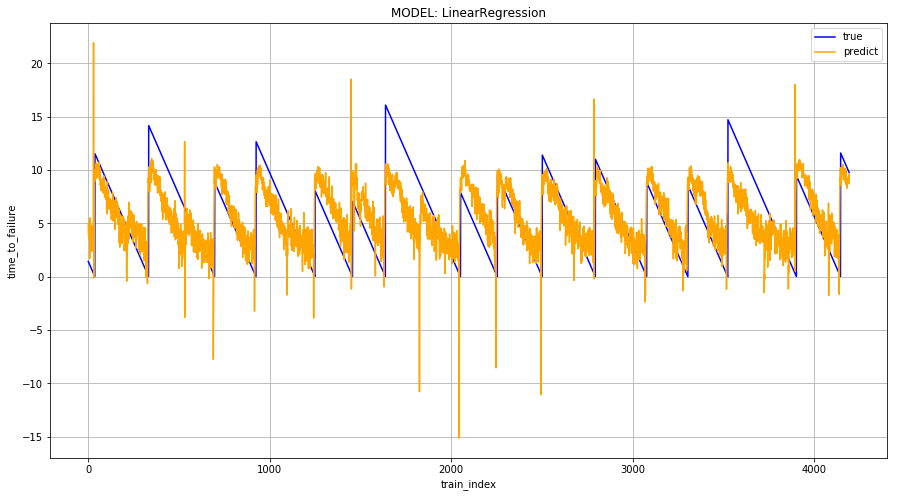

In [155]:
# 1.linear regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

LR_model=LinearRegression()
y_pred,error = make_predictions(LR_model, X_all_scaled, target,
                                TITLE='MODEL: LinearRegression')
print("MAE is",error)

MAE is 2.0526343391689617


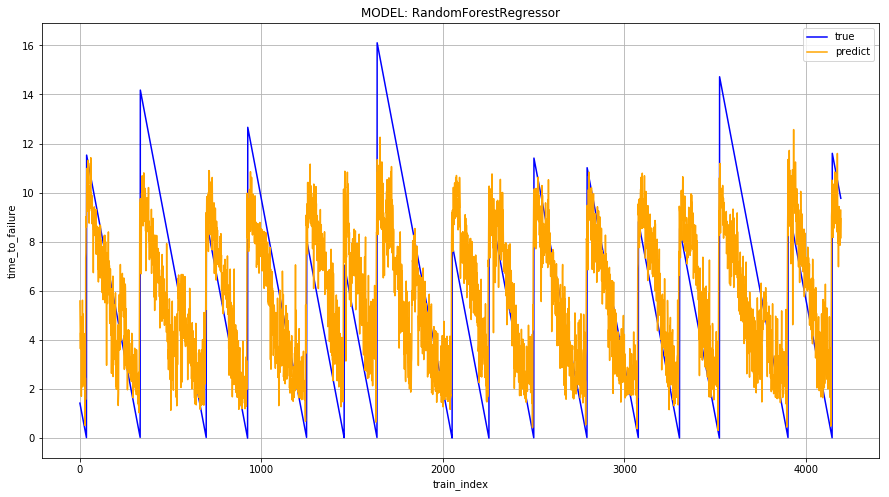

In [156]:
# 2.RandomForestRegressor
RF_model=RandomForestRegressor(n_estimators=100)
y_pred,error = make_predictions(RF_model, X_all_scaled, target,
                               TITLE='MODEL: RandomForestRegressor')
print("MAE is",error)

MAE is 2.014623617734727


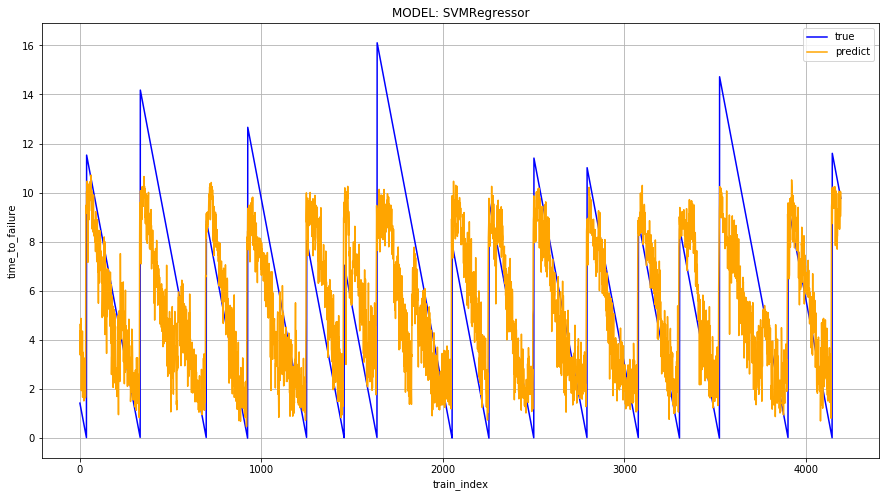

In [157]:
# 3.SVMRegressor
SVM_model=SVR(kernel='rbf', gamma='scale')
y_pred,error = make_predictions(SVM_model, X_all_scaled, target,
                               TITLE='MODEL: SVMRegressor')
print("MAE is",error)

MAE is 2.224024821821722


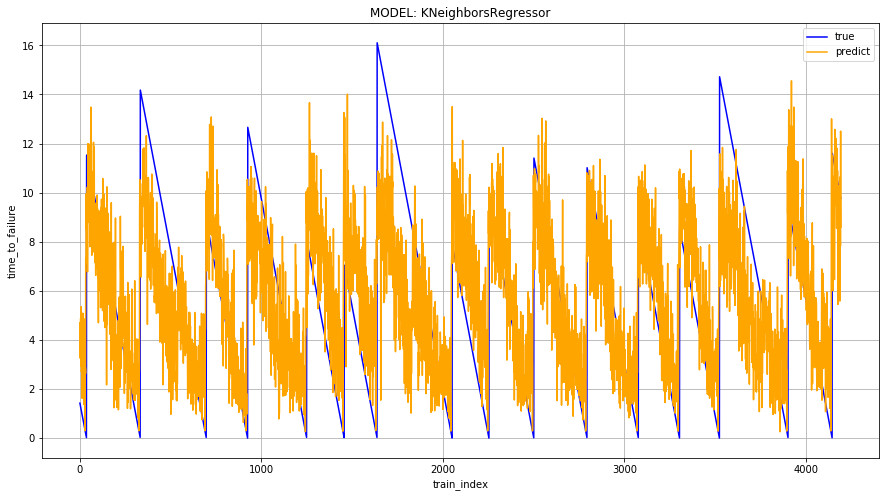

In [158]:
# 4.KNeighborsRegressor
KNN_model=KNeighborsRegressor()
y_pred,error = make_predictions(KNN_model, X_all_scaled, target,
                               TITLE='MODEL: KNeighborsRegressor')
print("MAE is",error)

In [159]:
# -------------4. 在测试集数据上验证结果-------------


# 读取测试集数据
submission = pd.read_csv('../input/sample_submission.csv',
                         index_col = 'seg_id')
X_test = pd.DataFrame(columns=X_train.columns, #Use the same columns as our X_train
                      dtype=np.float64,
                      index=submission.index) #Use the index ('seg_id') from the sample submission

for i in tqdm_notebook(X_test.index,total=len(X_test.index),desc='读取测试集数据'):
    #Read in that segments csv file
    #By putting f before the string we can put any values between {} and it will be treated as a string
    seg = pd.read_csv(f'../input/test/{i}.csv') 
                                            
    #Grab the acoustic_data values
    x = seg['acoustic_data']

    #These are the same features we calcuted on the training data
    

    # For every 150,000 rows, we make these calculations
    X_test.loc[i, 'mean'] = np.mean(x)
    X_test.loc[i, 'median'] = np.median(x)
    X_test.loc[i, 'std'] = np.std(x)
    X_test.loc[i, 'max'] = np.max(x)
    X_test.loc[i, 'min'] = np.min(x)
    X_test.loc[i, 'abs_max'] = np.abs(x).max()
    X_test.loc[i, 'abs_min'] = np.abs(x).min()
    X_test.loc[i, 'ptp'] = np.ptp(x)  # Peak-to-peak is like range
    # We can also grab percentiles
    X_test.loc[i, '10p'] = np.percentile(x, q=10)
    X_test.loc[i, '25p'] = np.percentile(x, q=25)
    X_test.loc[i, '50p'] = np.percentile(x, q=50)
    X_test.loc[i, '75p'] = np.percentile(x, q=75)
    X_test.loc[i, '90p'] = np.percentile(x, q=90)
    
    for windows in [10, 100, 1000]:
        x_roll_std = x.rolling(windows).std().dropna().values
        x_roll_mean = x.rolling(windows).mean().dropna().values
        
        X_test.loc[i, 'ave_roll_std_' + str(windows)] = x_roll_std.mean()
        X_test.loc[i, 'std_roll_std_' + str(windows)] = x_roll_std.std()
        X_test.loc[i, 'max_roll_std_' + str(windows)] = x_roll_std.max()
        X_test.loc[i, 'min_roll_std_' + str(windows)] = x_roll_std.min()
        X_test.loc[i, 'q10_roll_std_' + str(windows)] = np.percentile(x_roll_std, q=10)
        X_test.loc[i, 'q25_roll_std_' + str(windows)] = np.percentile(x_roll_std, q=25)
        X_test.loc[i, 'q50_roll_std_' + str(windows)] = np.percentile(x_roll_std, q=50)
        X_test.loc[i, 'q75_roll_std_' + str(windows)] = np.percentile(x_roll_std, q=75)
        X_test.loc[i, 'q90_roll_std_' + str(windows)] = np.percentile(x_roll_std, q=90)
        
        
        X_test.loc[i, 'ave_roll_mean_' + str(windows)] = x_roll_mean.mean()
        X_test.loc[i, 'std_roll_mean_' + str(windows)] = x_roll_mean.std()
        X_test.loc[i, 'max_roll_mean_' + str(windows)] = x_roll_mean.max()
        X_test.loc[i, 'min_roll_mean_' + str(windows)] = x_roll_mean.min()
        X_test.loc[i, 'q10_roll_mean_' + str(windows)] = np.percentile(x_roll_mean, q=10)
        X_test.loc[i, 'q25_roll_mean_' + str(windows)] = np.percentile(x_roll_mean, q=25)
        X_test.loc[i, 'q50_roll_mean_' + str(windows)] = np.percentile(x_roll_mean, q=50)
        X_test.loc[i, 'q75_roll_mean_' + str(windows)] = np.percentile(x_roll_mean, q=75)
        X_test.loc[i, 'q90_roll_mean_' + str(windows)] = np.percentile(x_roll_mean, q=90)

        

In [162]:
# 测试集数据正则化处理
scaler = StandardScaler()
scaler.fit(X_all)
X_test_scaled = scaler.transform(X_test)

# 四个模型都生成一下预测结果model_submission.csv
name_l=['LR','RF','SVM','KNN']
model_l=[LR_model,RF_model,SVM_model,KNN_model]

for name,model in zip(name_l,model_l):
    test_predictions = model.predict(X_test_scaled)
    submission['time_to_failure'] = test_predictions
    submission.to_csv('../%s_submission.csv'%(name))